In [3]:
pip install qiskit-ignis

Note: you may need to restart the kernel to use updated packages.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8496\653509242.py:20: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = backend.run(qobj)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_8496\653509242.py:26: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  cal_job = backend.run(assemble(cal_circuits, backend=backend))


Original counts:
{'111': 503, '000': 497}
Mitigated counts:
{'000': 496.99999998302985, '001': 5.636487076777923e-09, '010': 5.660128613443648e-09, '011': 5.661631339590832e-09, '100': 5.665183402989503e-09, '101': 5.67105452223857e-09, '110': 5.665898591710172e-09, '111': 502.9999999830096}


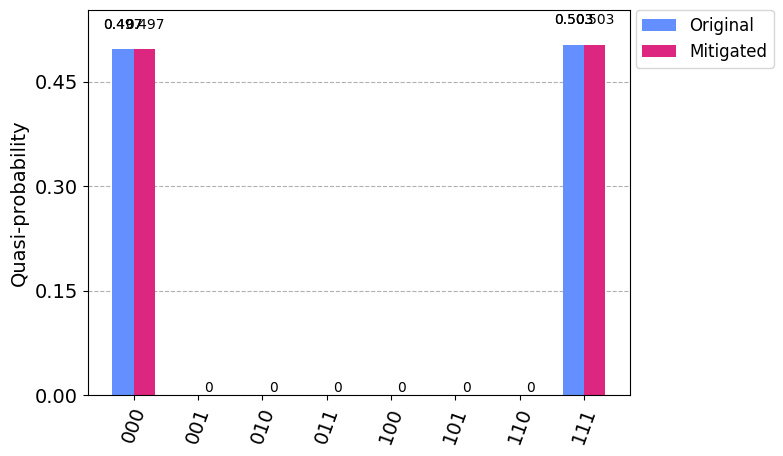

In [6]:
from qiskit import QuantumCircuit, assemble, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.ignis.mitigation.measurement import CompleteMeasFitter, complete_meas_cal, tensored_meas_cal

# Define the quantum circuit
qc = QuantumCircuit(3, 3)

# Apply gates and operations to the circuit
qc.h(0)
qc.cx(0, 1)
qc.cx(0, 2)
qc.measure([0, 1, 2], [0, 1, 2])

# Transpile the circuit
backend = Aer.get_backend('qasm_simulator')
transpiled_qc = transpile(qc, backend)

# Simulate the noisy circuit
qobj = assemble(transpiled_qc, shots=1000)
job = backend.run(qobj)
result = job.result()
counts = result.get_counts()

# Perform error mitigation
cal_circuits, state_labels = complete_meas_cal(qubit_list=[0, 1, 2])
cal_job = backend.run(assemble(cal_circuits, backend=backend))
cal_results = cal_job.result()
meas_fitter = CompleteMeasFitter(cal_results, state_labels)
mitigated_counts = meas_fitter.filter.apply(counts)

# Print the original counts
print("Original counts:")
print(counts)

# Print the mitigated counts
print("Mitigated counts:")
print(mitigated_counts)

# Plot the histograms of the original and mitigated counts
plot_histogram([counts, mitigated_counts], legend=['Original', 'Mitigated'])


In [5]:
pip install qiskit-aer

  Obtaining dependency information for qiskit-aer from https://files.pythonhosted.org/packages/83/25/c6562bc2c4abaa0eb387aaf6add65e7a9cc21661d07881731cbdad971e41/qiskit_aer-0.12.2-cp39-cp39-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.6 MB 1.3 MB/s eta 0:00:08
   ---------------------------------------- 0.1/9.6 MB 653.6 kB/s eta 0:00:15
   ---------------------------------------- 0.1/9.6 MB 1.1 MB/s eta 0:00:09
    --------------------------------------- 0.1/9.6 MB 599.1 kB/s eta 0:00:16
   - -------------------------------------- 0.3/9.6 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.3/9.6 MB 1.2 MB/s eta 0:00:08
   - -------------------------------------- 0.5/9.6 MB 1.3 MB/s eta 0:00:07
   -- ------------------------------------- 0.5/9.6 MB 1.5 MB/s eta 0:00:07
   -- ------------------------------------- 0.7/9.6 MB 1.7 MB/s eta 0:00:06
   --- -----------------------